In [29]:
import os
import pandas as pd

In [30]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [31]:
pwd

'/home/nbuser/library/Taller1'

In [32]:
base_dir = os.path.join( '.','data')
ciudad = 'Barranquilla'
fuente_tierra = 'IDEAM'
fuente_satelite = 'NREL'

# Datos tomados por el IDEAM (Tomados en tierra)
serie_csv_tierra = os.path.join(base_dir,ciudad,fuente_tierra+'.csv')
serie_pd_tierra = pd.read_csv(serie_csv_tierra, sep = ';',
                encoding='latin-1')

# Datos tomados por la NASA (Tomados por el satélite)
serie_csv_satelite = os.path.join(base_dir,ciudad,fuente_satelite+'.csv')
serie_pd_satelite = pd.read_csv(serie_csv_satelite, sep = ';',
                encoding='latin-1')


In [33]:
# A continuación se define la función ghi_mensual, la cual calcula la energía total en kWh/m^2 para cada mes en la serie de datos.
# Igualmente, la función ghi_dia calcula el promedio diario de cada mes

In [34]:
def ghi_mensual(serie_horaria):
    agnos = sorted(serie_horaria['AÑO'].unique())
    ghi_df = pd.DataFrame(columns=["AÑO", "MES", "DIAS", "GHImes"])
    for agno in agnos:
        for mes in range(1,13):
            nombre_energia = list(serie_horaria)[-1]
            dias = sorted(serie_horaria[(serie_horaria['AÑO'] == agno) &
                        (serie_horaria['MES'] == mes)]["DIA"].unique())
            ghi_mes = serie_horaria.loc[((serie_horaria["AÑO"] == agno)
                            & (serie_horaria["MES"] == mes)),
                                        nombre_energia].sum()/1000
            ghi_dict = {"AÑO":agno, "MES":mes, "DIAS":dias[-1],
                        "GHImes":ghi_mes}
            ghi_df = ghi_df.append(ghi_dict, ignore_index=True)
    return ghi_df

In [35]:
def ghi_dia(serie_ghi_mensual):
    agnos = sorted(serie_ghi_mensual['AÑO'].unique())
    ghi_df = pd.DataFrame(columns=["AÑO", "MES", "GHIdiario"])
    for agno in agnos:
        for mes in range(1,13):
            dias = serie_ghi_mensual.loc[((serie_ghi_mensual["AÑO"] == agno)
                            & (serie_ghi_mensual["MES"] == mes))
                                         ,"DIAS"].item()
            ghi_diario = serie_ghi_mensual.loc[(
                (serie_ghi_mensual["AÑO"] == agno)
                            & (serie_ghi_mensual["MES"] == mes)),
                "GHImes"].item()/dias
            ghi_dict = {"AÑO":agno, "MES":mes, "GHIdiario":ghi_diario}
            ghi_df = ghi_df.append(ghi_dict, ignore_index=True)
    return ghi_df

In [36]:
# Luego, se utilizan las funciones en los datos anteriores

In [37]:
# Aplicación de las funciones para el IDEAM

ghi_mensual_loc_tierra = ghi_mensual(serie_pd_tierra)
ghi_diario_loc_tierra = ghi_dia(ghi_mensual_loc_tierra)
datos_IDEAM = sorted(ghi_diario_loc_tierra["GHIdiario"])

# Aplicación de las funciones para los datos satelitales

ghi_mensual_loc_satelite = ghi_mensual(serie_pd_satelite)
ghi_diario_loc_satelite = ghi_dia(ghi_mensual_loc_satelite)
datos_NREL = sorted(ghi_diario_loc_satelite["GHIdiario"])


In [13]:
# Posteriormente, se plotean los datos en orden ascendente

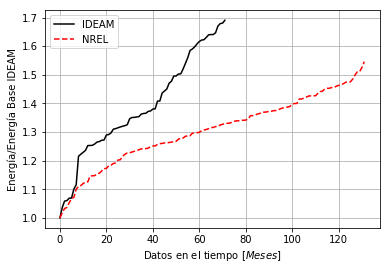

In [40]:
pylab.xlabel("Datos en el tiempo $[Meses]$")
pylab.ylabel("Energía/Energía Base IDEAM")
numdatos_tierra = range(len(datos_IDEAM))
numdatos_satelite = range(len(datos_NREL))
pylab.plot(numdatos_tierra,datos_IDEAM/datos_IDEAM[0],'-k', label='IDEAM')
pylab.plot(numdatos_satelite,datos_NREL/datos_NREL[0],'--r', label='NREL')

pylab.grid()
pylab.legend(loc='upper left')


In [20]:
percentil = 0.01
enficc = ghi_diario_loc.quantile(q=percentil, 
                                 numeric_only=True)["GHIdiario"]
print('La ENFICC 99% es: ', enficc)

La ENFICC 99% es:  4.16059025817


In [21]:
list(ghi_mensual_loc)

['AÑO', 'MES', 'DIAS', 'GHImes']